## Car Price Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
cars= pd.read_csv(r"C:\Users\mhaasa\Downloads\CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data Cleaning

In [6]:
#checking missing value

cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# select numeric columns to check feature relation 

car_numeric= cars.select_dtypes(include=['int64','float64'])
car_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# select numeric columns to check feature relation 

car_numeric= cars.select_dtypes(include=['int64','float64'])
car_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#pair plot to view the relation between feature coulmns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.pairplot(car_numeric)
sns.plt.show()

### Correlation matrix

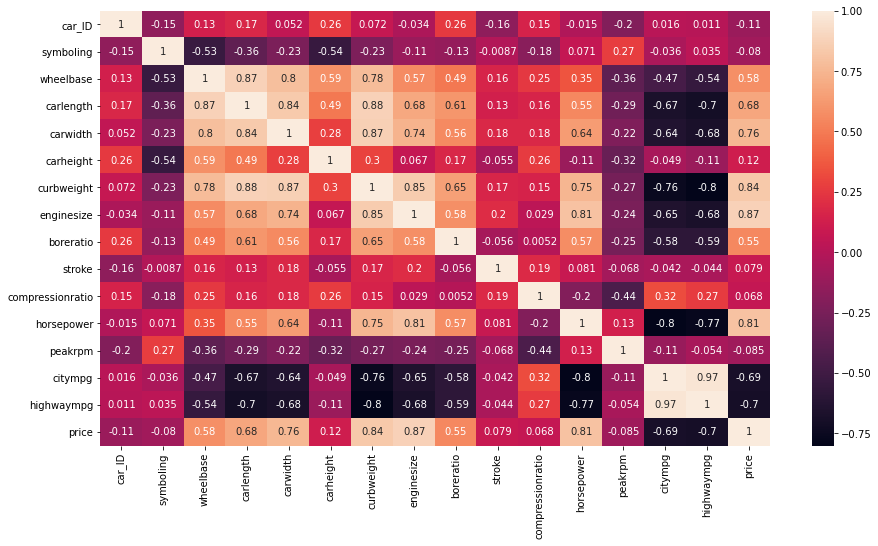

In [16]:
#heat map to view the correlations between the columns

plt.figure(figsize=(15,8))
sns.heatmap(car_numeric.corr(), annot =True)

## Useful insights from Corr Heatmap 

In [22]:
#Price (dependent variable) highly correlated with enginesize, curbweight, horsepower, carwidth.

#Price negatively corr with mpg var's citympg and highwaympg.

#Many independent variables such as correlated; wheelbase, carlength, curbweight, enginesize etc are highly correlated.

### Data Preparation

In [23]:
#New column with car name

cars['car_company'] =cars['CarName'].apply(lambda x:x.split(" ")[0])
cars['car_company'][:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: car_company, dtype: object

In [24]:
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
vw              2
maxda           2
mercury         1
Nissan          1
vokswagen       1
porcshce        1
toyouta         1
Name: car_company, dtype: int64

In [25]:
#data cleaning for car company columns

cars.loc[(cars['car_company'] =='vw') |  (cars['car_company'] =='vokswagen'), 'car_company']= "volkswage"

In [26]:
cars['car_company']=cars['car_company'].str.replace('toyouta','toyota')
cars['car_company']=cars['car_company'].str.replace('maxda','mazda')
cars['car_company']=cars['car_company'].str.replace('Nissan','nissan')
cars['car_company']=cars['car_company'].str.replace('porcshce','peugeot')

In [27]:
cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        12
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
volkswage       3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: car_company, dtype: int64

In [28]:
#drop car name column

cars.drop('CarName',axis=1,inplace=True)

In [29]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [30]:
#columns with numeric value in words

print(cars['cylindernumber'].value_counts())
print(cars['doornumber'].value_counts())

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64


In [31]:
#function to convert numeric value of columns containing numeric value as variable

def num_col(x):
    return x.map({'two':2,'three':3,'four': 4, 'five':5, 'six':6,'eight':8,'twelve':12})

cars[['cylindernumber','doornumber']]=cars[['cylindernumber','doornumber']].apply(num_col)

In [32]:
#converting all data into numeric
#selecting only string type columns

cars_cat=cars.select_dtypes(include=['object'])

In [33]:
#dummy encoding 

car_dummy=pd.get_dummies(cars_cat, drop_first=True)

In [34]:
#remove columns for which dummies are created 

cars=cars.drop(list(cars_cat.columns),axis =1)

In [35]:
#concat original data frame and dummy data frame

cars= pd.concat([cars,car_dummy], axis =1)
cars.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswage,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#remove/drop the unimportant features

cars= cars.drop('car_ID',axis=1)

## Model Building

In [37]:
#feature data

X = cars.drop('price', axis=1)

In [38]:
# target data

y= cars['price']

In [39]:
#split data into train set and  test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state = 100)

In [40]:
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswage,car_company_volkswagen,car_company_volvo
122,1,4,93.7,167.3,63.8,50.8,2191,4,98,2.97,...,0,1,0,0,0,0,0,0,0,0
125,3,2,94.5,168.9,68.3,50.2,2778,4,151,3.94,...,0,0,1,0,0,0,0,0,0,0
166,1,2,94.5,168.7,64.0,52.6,2300,4,98,3.24,...,0,0,0,0,0,0,1,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
199,-1,4,104.3,188.8,67.2,57.5,3157,4,130,3.62,...,0,0,0,0,0,0,0,0,0,1


In [41]:
X_train.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercury',
       'car_company_mitsubishi', 'car_company_nissan', 'car_compan

In [42]:
#columns to be standardised

scale_list=['wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight']

In [43]:
#standardising data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train[scale_list]=scaler.fit_transform(X_train[scale_list])

In [44]:
# fit to Linear regression model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train , y_train)

LinearRegression()

In [45]:
lm.coef_

array([-6.98166212e+01,  1.54275638e+02,  1.62199829e+03, -9.31998743e+02,
        1.72745290e+03, -1.31146305e+03,  2.11214244e+03, -1.94629521e+03,
        1.90916092e+02, -9.46796334e+03, -2.78003808e+03, -9.20501277e+02,
       -2.67526963e+01,  3.05241755e+00,  6.72484467e+01,  9.21659907e+01,
       -5.56809586e+03,  3.07499854e+03, -4.20605930e+03, -4.74777613e+03,
       -3.95335108e+03, -3.25691356e+03, -4.92127209e+02,  3.70603188e+02,
        7.71281087e+03,  7.02733709e+03,  7.69990138e+03,  2.12594343e+03,
        4.68862802e+03, -1.55186387e+01,  8.75626602e+03,  9.28161048e+02,
       -2.40610495e+03,  5.56809586e+03, -1.81898940e-12, -2.98932729e+02,
       -4.21018555e+02,  9.09494702e-13, -1.07336320e+03,  7.85325101e+03,
        7.83338383e+02, -4.61911060e+03, -5.61389845e+03, -3.93132986e+03,
       -2.41023281e+03, -2.00911723e+03, -1.30631486e+03, -3.63797881e-12,
       -6.33302793e+03, -1.98219118e+03, -1.04894563e+04, -5.58346499e+03,
        6.08678764e+03, -

In [46]:
lm.intercept_

36969.21469597689

## Feature Selection

In [47]:
from sklearn.feature_selection import RFE
rfe=RFE(lm, 10)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [48]:
import statsmodels.api as sm
col=X_train.columns[rfe.support_]
X_train_rfe= X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm1= sm.OLS(y_train,X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.2
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           1.81e-64
Time:                        00:48:55   Log-Likelihood:                -1313.4
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     133   BIC:                             2676.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.227e+04    

In [49]:
#VIF-1

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,enginelocation_rear,inf
4,enginetype_ohcf,inf
10,car_company_subaru,inf
8,car_company_peugeot,10.0
3,enginetype_l,9.0
0,const,2.0
1,curbweight,2.0
9,car_company_porsche,2.0
5,car_company_bmw,1.0
6,car_company_buick,1.0


In [50]:
X_train_rfe.drop(["enginetype_l"],axis=1,inplace=True)

In [51]:
X_train_rfe

,const,curbweight,enginelocation_rear,enginetype_ohcf,car_company_bmw,car_company_buick,car_company_jaguar,car_company_peugeot,car_company_porsche,car_company_subaru
122,1.0,-0.642128,0,0,0,0,0,0,0,0
125,1.0,0.439415,0,0,0,0,0,0,1,0
166,1.0,-0.441296,0,0,0,0,0,0,0,0
1,1.0,0.015642,0,0,0,0,0,0,0,0
199,1.0,1.137720,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,1.0,-0.251520,0,0,0,0,0,0,0,0
103,1.0,0.958998,0,0,0,0,0,0,0,0
67,1.0,1.797333,0,0,0,1,0,0,0,0
24,1.0,-1.054847,0,0,0,0,0,0,0,0


In [52]:
#RFE -2

lm1= sm.OLS(y_train,X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     162.9
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           3.83e-65
Time:                        00:49:34   Log-Likelihood:                -1314.5
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     134   BIC:                             2674.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.228e+04    

In [53]:
#VIF -2

vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,enginelocation_rear,inf
3,enginetype_ohcf,inf
9,car_company_subaru,inf
0,const,2.0
1,curbweight,2.0
8,car_company_porsche,2.0
4,car_company_bmw,1.0
5,car_company_buick,1.0
6,car_company_jaguar,1.0
7,car_company_peugeot,1.0


In [54]:
X_train_rfe.drop(["car_company_subaru"],axis=1,inplace=True)

In [55]:
#RFE -3

lm1= sm.OLS(y_train,X_train_rfe).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     162.9
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           3.83e-65
Time:                        00:50:00   Log-Likelihood:                -1314.5
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     134   BIC:                             2674.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.228e+04    253.198     48.498      0.000    1.18e+04    1.28e+04
curbweight           5454.5193    297.830     18.314      0.000    4865.463    6043.576
enginelocation_rear  1.197e+04   3108.028      3.852      0.000    5826.387    1.81e+04
enginetype_ohcf     -1479.0026    777.701     -1.902      0.059   -3017.160      59.155
car_company_bmw      1.029e+04   1079.363      9.532      0.000    8153.442    1.24e+04
car_company_buick    7065.9456   1334.395      5.295      0.000    4426.745    9705.146
car_company_jaguar   7367.8741   1697.912      4.339      0.000    4009.699    1.07e+04
car_company_peugeot -3694.0623   1014.064     -3.643      0.000   -5699.704   -1688.420
car_company_porsche  9078.1429   1792.476      5.065      0.000    5532.937    1.26e+04
==============================================================================
Omnibus:                       17.628   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.883
Skew:                           0.314   Prob(JB):                     7.33e-13
Kurtosis:                       5.997   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#VIF -3

vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
0,const,2.0
1,curbweight,2.0
2,enginelocation_rear,2.0
8,car_company_porsche,2.0
3,enginetype_ohcf,1.0
4,car_company_bmw,1.0
5,car_company_buick,1.0
6,car_company_jaguar,1.0
7,car_company_peugeot,1.0


In [57]:
X_train_rfe.drop(["enginetype_ohcf"],axis=1,inplace=True)

In [58]:
#RFE-4

lm1= sm.OLS(y_train,X_train_rfe).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     182.1
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           1.61e-65
Time:                        00:50:31   Log-Likelihood:                -1316.4
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     135   BIC:                             2672.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.215e+04    245.981     49.388      0.000    1.17e+04    1.26e+04
curbweight           5476.5996    300.474     18.227      0.000    4882.354    6070.845
enginelocation_rear  1.051e+04   3039.935      3.456      0.001    4495.322    1.65e+04
car_company_bmw       1.04e+04   1088.101      9.560      0.000    8249.969    1.26e+04
car_company_buick    7150.1695   1346.523      5.310      0.000    4487.162    9813.177
car_company_jaguar   7438.4557   1713.879      4.340      0.000    4048.930    1.08e+04
car_company_peugeot -3591.0989   1022.384     -3.512      0.001   -5613.061   -1569.137
car_company_porsche  9187.5901   1808.832      5.079      0.000    5610.277    1.28e+04
==============================================================================
Omnibus:                       16.933   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.835
Skew:                           0.368   Prob(JB):                     1.11e-10
Kurtosis:                       5.674   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#VIF-4

vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
1,curbweight,2.0
7,car_company_porsche,2.0
0,const,1.0
2,enginelocation_rear,1.0
3,car_company_bmw,1.0
4,car_company_buick,1.0
5,car_company_jaguar,1.0
6,car_company_peugeot,1.0


## Prediction

In [60]:
#standardising test data

X_test[scale_list]=scaler.transform(X_test[scale_list])

In [61]:
col

Index(['curbweight', 'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'car_company_bmw', 'car_company_buick', 'car_company_jaguar',
       'car_company_peugeot', 'car_company_porsche', 'car_company_subaru'],
      dtype='object')

In [62]:
#creating the model with text data

X_test_rfe=X_test[col]
X_test_rfe.drop(['enginetype_l','car_company_subaru','enginetype_ohcf'],axis=1,inplace=True)

In [63]:
#addind constant

X_test_rfe=sm.add_constant(X_test_rfe)

In [64]:
#prediction 

y_pred= lm1.predict(X_test_rfe)

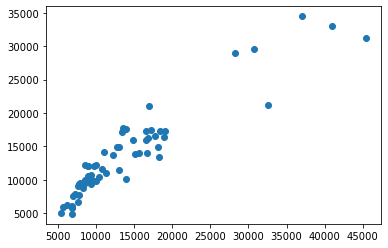

In [65]:
#test and predicted data plot

plt.scatter(y_test, y_pred)

In [66]:
# R2_score calculation 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8534879493742429

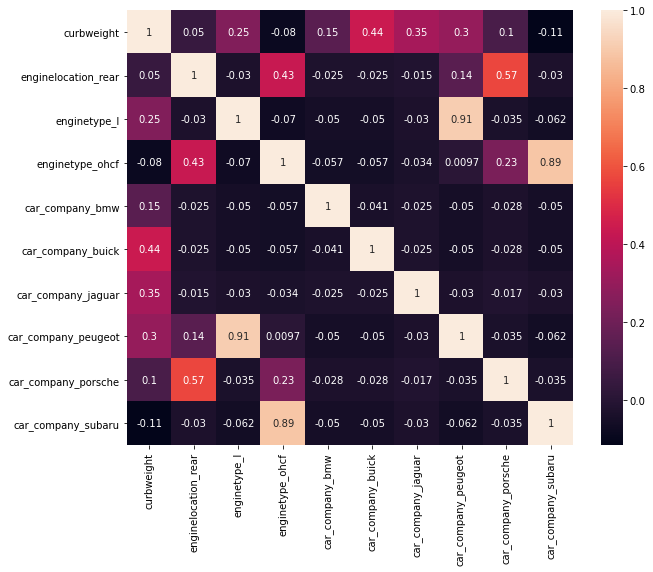

In [67]:
#heat map

plt.figure(figsize=(10,8))
sns.heatmap(cars[col].corr(),annot =True)

Text(0.5, 0, 'Index')

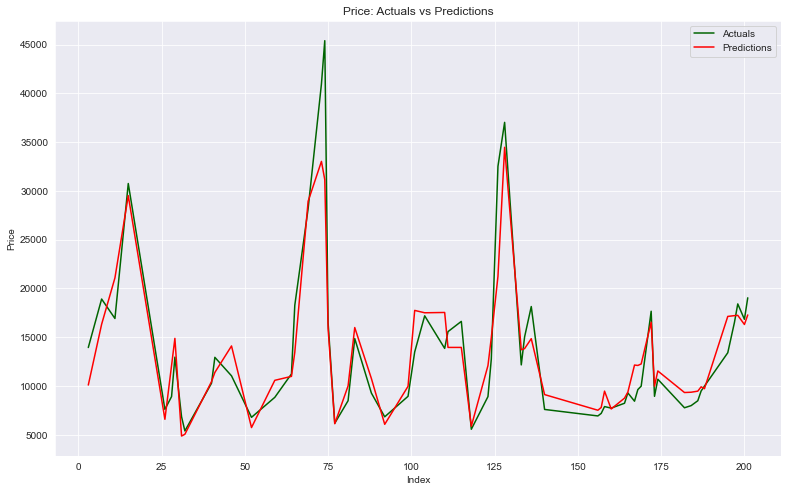

In [68]:
# graph between actual data and predicted data  

sns.set_style("darkgrid")
fig, ax=plt.subplots(figsize=(13,8))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='darkgreen',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

In [69]:
#The predicted values are mostly same as Actual values